# Multi Linear Regression on Computer Data

## Predict Price of the computer

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [2]:
comp_df = pd.read_csv('Computer_Data.csv')
comp_df

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [3]:
# Drop unwanted column
comp_df = comp_df.drop(['Unnamed: 0'], axis=1)
comp_df

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35


In [4]:
# Convert categorical data into discrete using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

select_column = ['cd', 'multi', 'premium']

le.fit(comp_df[select_column].values.flatten())

comp_df[select_column] = comp_df[select_column].apply(le.fit_transform)
comp_df

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,0,0,1,39,35
6255,2223,66,850,16,15,1,1,1,39,35
6256,2654,100,1200,24,15,1,0,1,39,35
6257,2195,100,850,16,15,1,0,1,39,35


#### EDA on dataset

In [5]:
# Check first 5 records
comp_df.head(5)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1


In [6]:
# Check last 5 records
comp_df.tail(5)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
6254,1690,100,528,8,15,0,0,1,39,35
6255,2223,66,850,16,15,1,1,1,39,35
6256,2654,100,1200,24,15,1,0,1,39,35
6257,2195,100,850,16,15,1,0,1,39,35
6258,2490,100,850,16,17,1,0,1,39,35


In [7]:
# Check for data types, non-null values & memory usage
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    6259 non-null   int64
 1   speed    6259 non-null   int64
 2   hd       6259 non-null   int64
 3   ram      6259 non-null   int64
 4   screen   6259 non-null   int64
 5   cd       6259 non-null   int32
 6   multi    6259 non-null   int32
 7   premium  6259 non-null   int32
 8   ads      6259 non-null   int64
 9   trend    6259 non-null   int64
dtypes: int32(3), int64(7)
memory usage: 415.8 KB


In [8]:
# Get central tendency, dispersion and shape of dataset’s distribution
comp_df.describe()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.139479,0.902221,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.346474,0.297040,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,0.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,0.000000,1.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,0.000000,1.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,0.000000,1.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,1.000000,339.000000,35.000000


In [9]:
# Checking Null values
comp_df.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [10]:
# Check for the column labels of the DataFrame
comp_df.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads', 'trend'],
      dtype='object')

In [11]:
# Check the dimensions of the DataFrame
print ('Data has {} rows and {} columns'.format(comp_df.shape[0], comp_df.shape[1]))

Data has 6259 rows and 10 columns


In [12]:
# Check for the random sample from the DataFrame
comp_df.sample(5)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
201,2785,33,250,8,17,0,0,1,100,3
3964,3188,50,212,4,17,0,0,0,273,18
3606,2690,100,426,8,15,1,0,1,339,17
868,2620,50,340,8,15,1,0,1,249,7
2239,1794,33,212,4,14,1,1,1,275,12


In [13]:
# Check for the Correlation
comp_df.corr()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.197343,-0.016651,-0.080696,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,0.258260,0.084172,0.114208,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,0.503570,0.092805,0.196924,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,0.438504,0.045497,0.197145,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,0.129488,-0.001740,0.018745,-0.093919,0.188614
cd,0.197343,0.258260,0.503570,0.438504,0.129488,1.000000,0.432179,0.216077,-0.061091,0.445780
multi,-0.016651,0.084172,0.092805,0.045497,-0.001740,0.432179,1.000000,0.124775,-0.030394,0.210907
premium,-0.080696,0.114208,0.196924,0.197145,0.018745,0.216077,0.124775,1.000000,-0.152023,0.042107
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,-0.061091,-0.030394,-0.152023,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,0.445780,0.210907,0.042107,-0.318553,1.000000


#### Visualize data

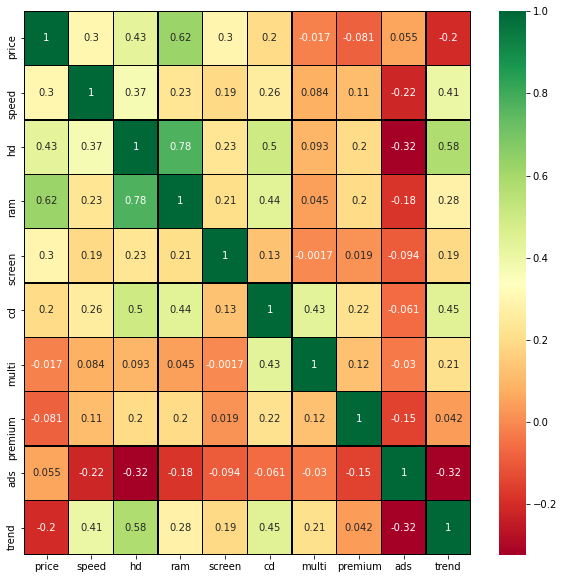

In [14]:
#corrolation plot
corrmat = comp_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10, 10))
x = sns.heatmap(comp_df[top_corr_features].corr(), annot = True, cmap = 'RdYlGn', linecolor = 'black', linewidths = 0.25)

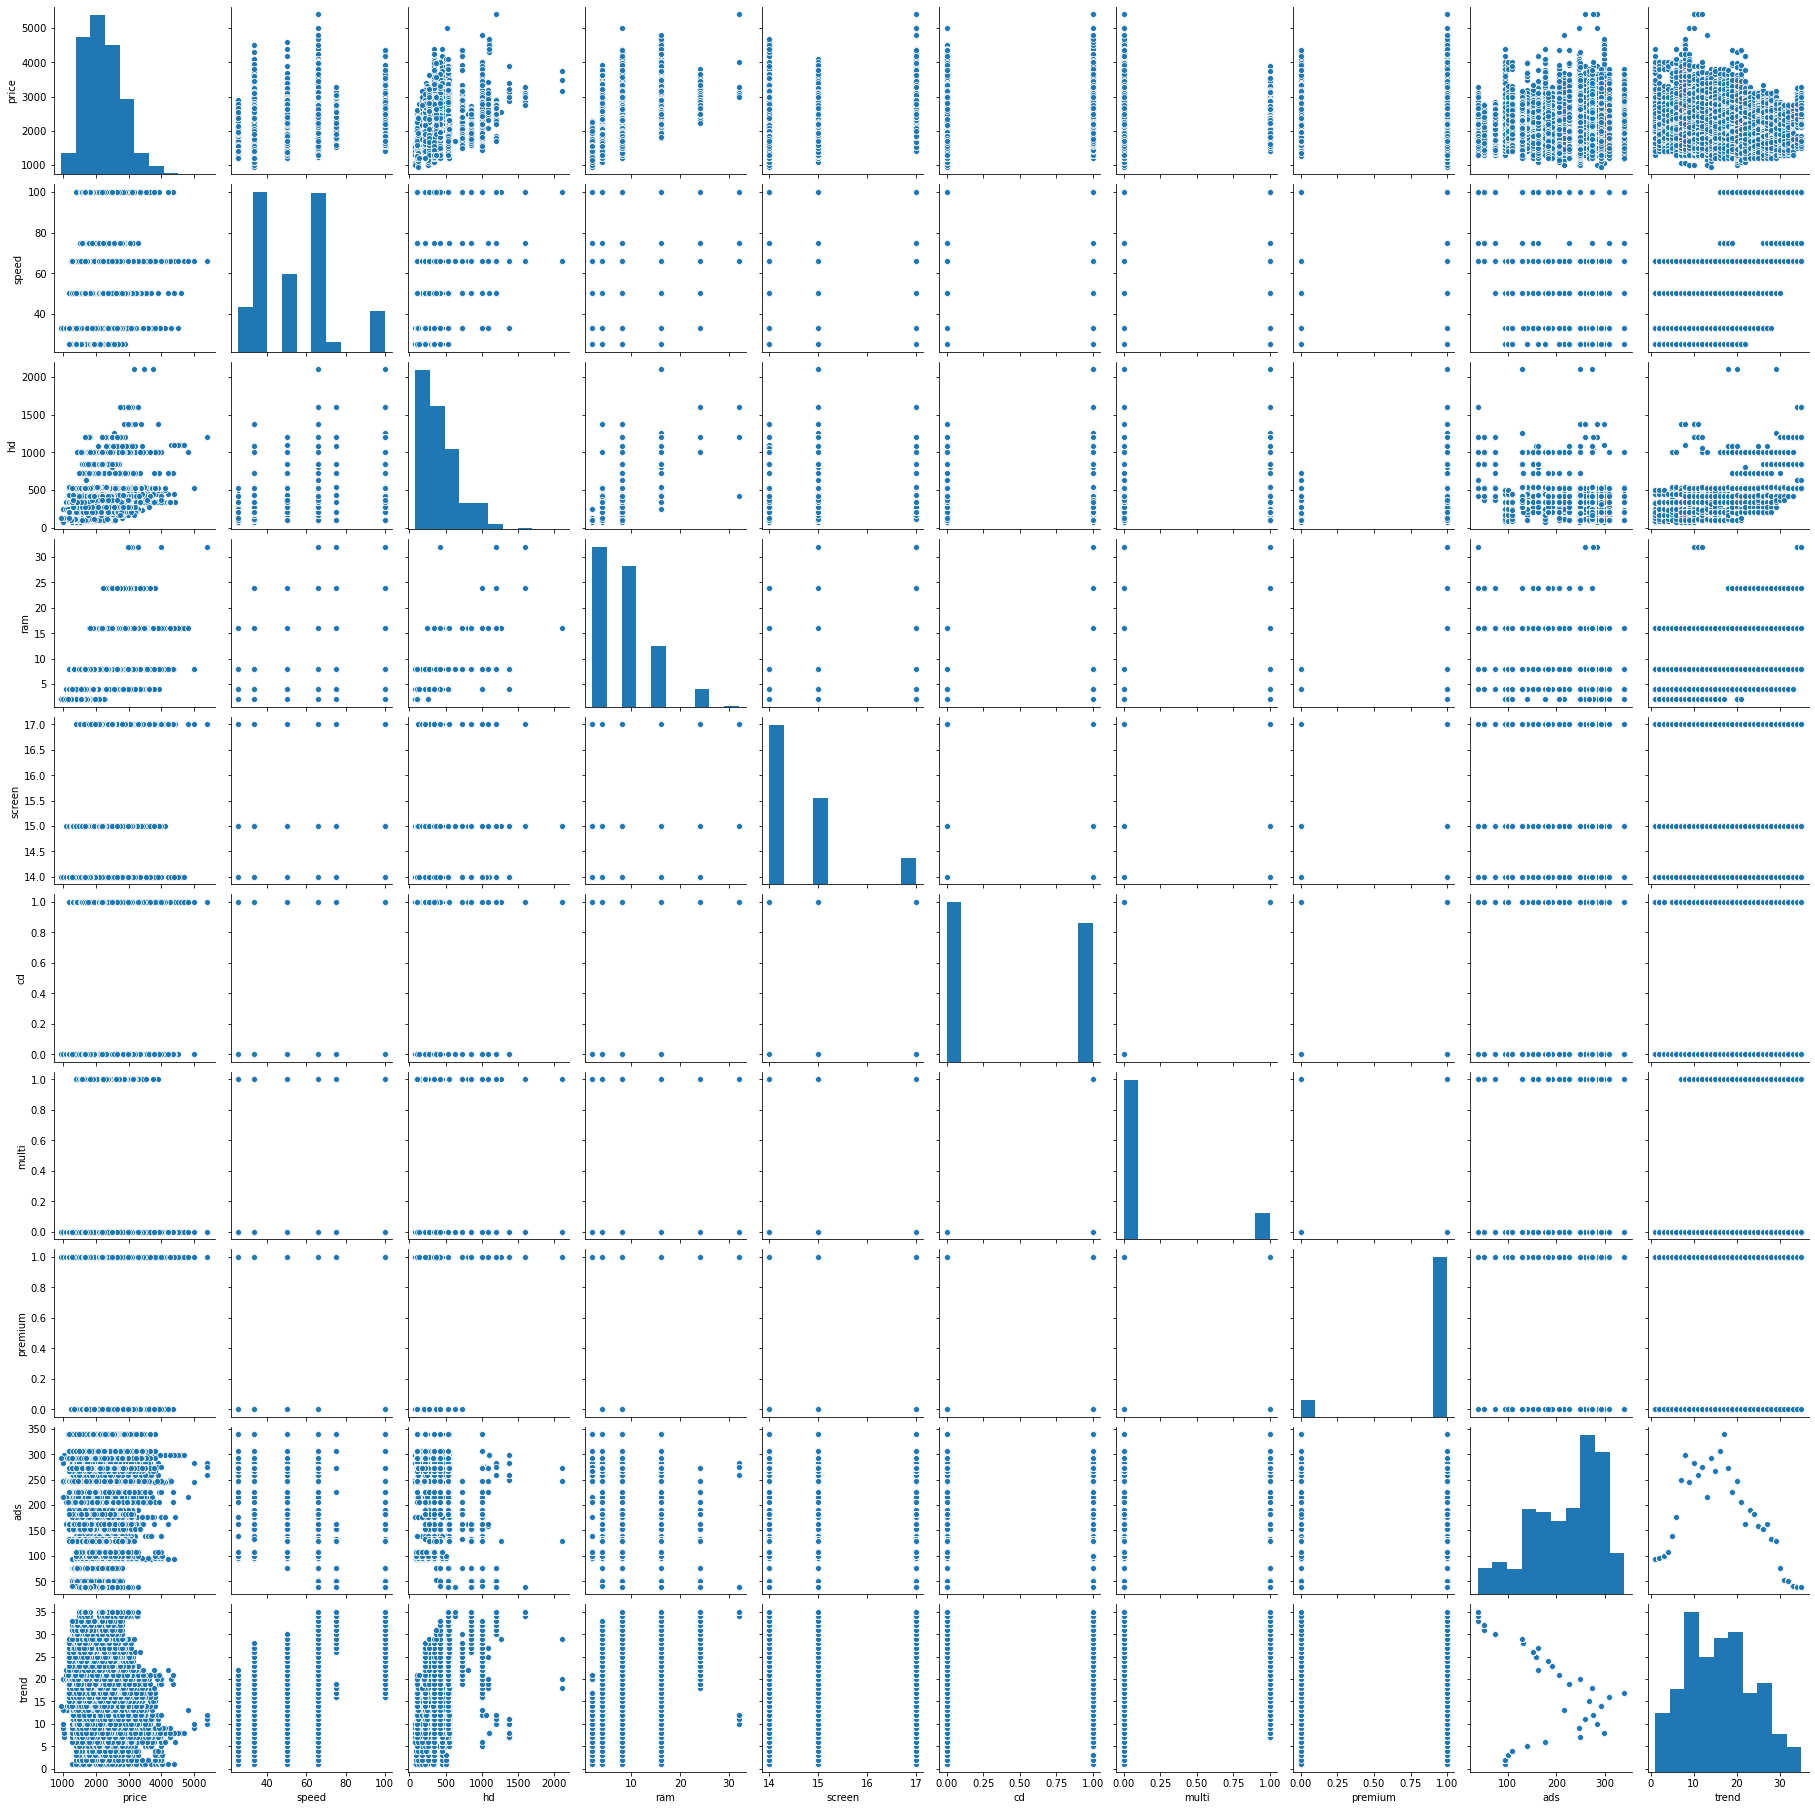

In [15]:
# Basic plotting & visualization
sns.pairplot(comp_df)

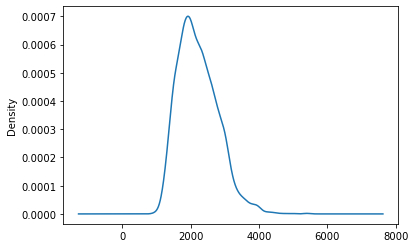

In [16]:
comp_df['price'].plot.density()

In [17]:
# Trains and Tests Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
l_column = list(comp_df.columns)
l_column

['price',
 'speed',
 'hd',
 'ram',
 'screen',
 'cd',
 'multi',
 'premium',
 'ads',
 'trend']

In [19]:
len_feature = len(l_column)
len_feature

10

In [20]:
# Put Price in the Y & all the other columns in the X
X = comp_df[l_column[1 : len_feature-1]]
X

,speed,hd,ram,screen,cd,multi,premium,ads
0,25,80,4,14,0,0,1,94
1,33,85,2,14,0,0,1,94
2,25,170,4,15,0,0,1,94
3,25,170,8,14,0,0,0,94
4,33,340,16,14,0,0,1,94
...,...,...,...,...,...,...,...,...
6254,100,528,8,15,0,0,1,39
6255,66,850,16,15,1,1,1,39
6256,100,1200,24,15,1,0,1,39
6257,100,850,16,15,1,0,1,39


In [21]:
Y = comp_df[l_column[0]]
Y

0       1499
1       1795
2       1595
3       1849
4       3295
        ... 
6254    1690
6255    2223
6256    2654
6257    2195
6258    2490
Name: price, Length: 6259, dtype: int64

In [22]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [23]:
print("Training feature test size : X_Train", X_Train.shape)
print("Training feature test size : Y_Train", Y_Train.shape)
print("Testing target test size : X_Test", X_Test.shape)
print("Testing target test size : Y_Test", Y_Test.shape)

Training feature test size : X_Train (4381, 8)
Training feature test size : Y_Train (4381,)
Testing target test size : X_Test (1878, 8)
Testing target test size : Y_Test (1878,)


In [24]:
# Model fitting & training
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_Train, Y_Train)

LinearRegression()

In [27]:
lm.intercept_

-25.213558696140353

In [28]:
lm.coef_

array([ 6.22059193e+00, -3.00122399e-01,  7.75642139e+01,  1.02943072e+02,
       -1.20560961e+02,  2.10756857e+01, -3.83277679e+02,  1.36196876e+00])

In [29]:
cdf = pd.DataFrame(data = lm.coef_, index = X_Train.columns, columns = ["Coefficients"])

In [30]:
cdf

,Coefficients
speed,6.220592
hd,-0.300122
ram,77.564214
screen,102.943072
cd,-120.560961
multi,21.075686
premium,-383.277679
ads,1.361969


In [31]:
# Calculation of standard errors and t-statistic for the co-efficients
n = X_Train.shape[0]
print("Number of Rows of X Train Data:", n)
k = X_Train.shape[1]
print("Number of Columns of X Train Data:", k)
dfN = n - k
print("Degree of Freedom:", dfN)

Number of Rows of X Train Data: 4381
Number of Columns of X Train Data: 8
Degree of Freedom: 4373


In [32]:
# Predictions
train_pred = lm.predict(X_Train)
train_pred

array([3078.48020196, 2144.69083126, 2636.24823375, ..., 2382.73605438,
       2737.89353419, 1945.72936991])

In [33]:
# Training Error
train_error = np.square(train_pred - Y_Train)
train_error

sum_error = np.sum(train_error)
print(sum_error)

708777893.1747427


In [34]:
# T Statistic
se = [0, 0, 0, 0, 0]
for i in range(k):
    r = (sum_error / dfN)
    r = r / np.sum(np.square(X_Train[list(X_Train.columns)]))
r

speed        0.011664
hd           0.000152
ram          0.364154
screen       0.172728
cd          80.237856
multi      271.037574
premium     40.950093
ads          0.000679
dtype: float64

In [35]:
l = list(cdf.index)
l

['speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium', 'ads']

Text(0.5, 1.0, 'screen Vs Price')

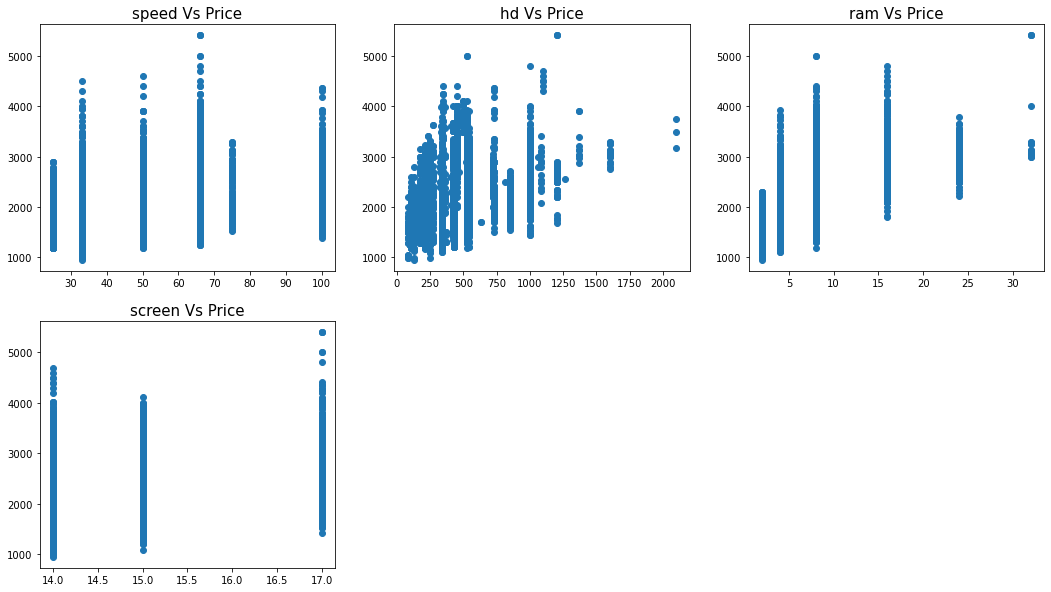

In [36]:
from matplotlib import gridspec
fig = plt.figure(figsize = (18, 10))
gs = gridspec.GridSpec(2, 3)
ax0 = plt.subplot(gs[0])
ax0.scatter(comp_df[l[0]], comp_df['price'])
ax0.set_title(l[0]+" Vs Price", fontdict = {'fontsize':15})

ax1 = plt.subplot(gs[1])
ax1.scatter(comp_df[l[1]], comp_df['price'])
ax1.set_title(l[1]+" Vs Price", fontdict = {'fontsize':15})

ax2 = plt.subplot(gs[2])
ax2.scatter(comp_df[l[2]], comp_df['price'])
ax2.set_title(l[2]+" Vs Price", fontdict = {'fontsize':15})

ax3 = plt.subplot(gs[3])
ax3.scatter(comp_df[l[3]], comp_df['price'])
ax3.set_title(l[3]+" Vs Price", fontdict = {'fontsize':15})

In [37]:
# R-Squared of the Model Fit
round(metrics.r2_score(Y_Train, train_pred), 2)

0.53

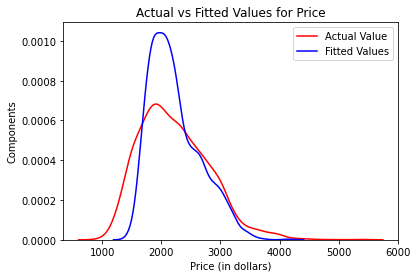

In [40]:
ax1 = sns.distplot(Y_Train, hist = False, color = "r", label = "Actual Value")
sns.distplot(train_pred, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Components')

plt.show()